

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

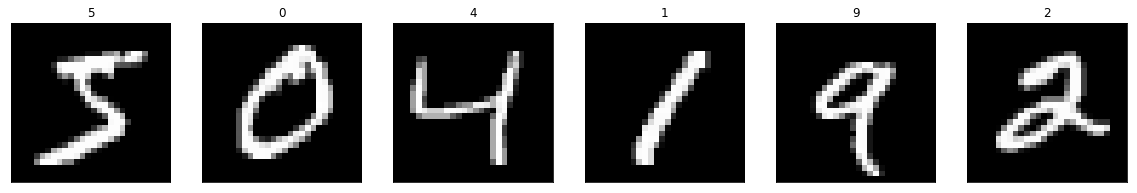

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

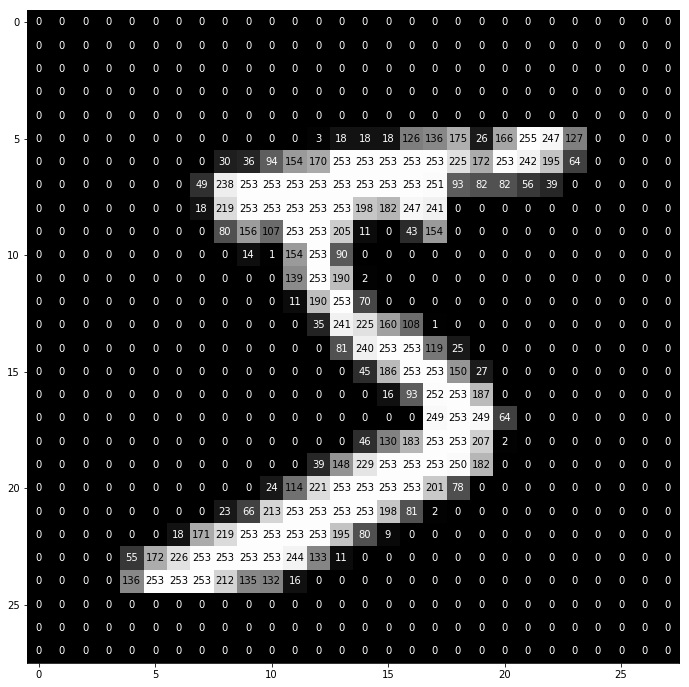

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In the case of a 4 by 4 image we can construct a vector with 16 entries. Where the first four entries of our vector correspond to the first row of our old matrix. The second four entries correspond to the second row and so on. In the case of our 28 by 28 matrices, will flatten them to a vector with 784 entries. After encoding our images as vectors, they can be fed into the input layer of an MLP. 

<img src="./img/rescale.gif" alt="Alt text that describes the graphic" title="Title text" />

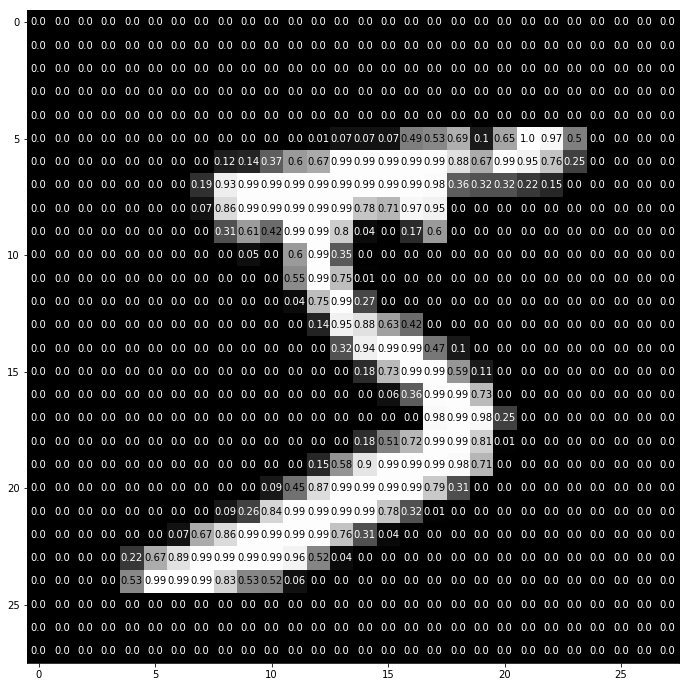

In [4]:
def visualize_input_rescaled(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input_rescaled(X_train[0], ax)

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [5]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Define the Model Architecture

#### Activation function
We'll begin by adding a ReLU activation function to all of our hidden layers. Remember that this function leaves positive values alone and sends all negative values to zero. We saw that the ReLU function helps with what's known as the **vanishing gradients problem**. By adding the ReLU function, we'll see that our model is able to attain much better accuracy.
> This activation function will also be extensively used in convolutional neural networks.

#### Drop out
In order to minimize over-fitting, we've learned that we can add dropout layers. We'll add a couple to this model. 

Remember that the dropout layers must be supplied a parameter between zero and one. This value corresponds to the probability that any node in the network is removed during training. When deciding its value, it's recommended to start small and see how the network responds. Then you can increase it if you see that it's necessary. We've chosen to set this parameter to 0.2. 

> #### Optional Resources
Check out the [first research paper](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) to propose dropout as a technique for overfitting.
Here's the Keras [documentation](https://keras.io/layers/core/#flatten) for the Flatten layer.
If you'd like more information on activation functions, check out this [website](http://cs231n.github.io/neural-networks-1/#actfun).


More examples: Dropout can be applied to input neurons called the visible layer, not only be applied on the Hidden Layers like below.
[Using Dropout on the Visible Layer](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model, Dense means fully connected layer 
model = Sequential()

# Flatten layer: Convert matrix to vector
model.add(Flatten(input_shape=X_train.shape[1:])) 
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# Output layer: Return 10 outputs because we have 10 diff. labels
model.add(Dense(10, activation='softmax')) 
# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


全連接層的意思就是每個neural彼此之間都有一條線(weight)相連。
全連接層神經網絡的Param，說明的是每層神經元權重的個數，所以它的計算如下：

- Param = （輸入數據維度+1）* 神經元個數
  之所以要加1，是考慮到每個神經元都有一個Bias。
  
第一個Dense層，輸入數據維度是784（一維數據），有512個神經元。所以，Param=(784+1)*512=401920.

第二個Dense層，輸入數據維度是512（經過第一層512個神經元作用後，輸出數據維度就是512了），有512個神經元。所以，Param=(512+1)*512=262656.

... will keep calculating in the future.

### 7. Compile the Model

 When we compile the function, we'll specify the loss function and optimizer. By adding this additional parameter with accuracy as a metric, we'll be able to check how the accuracy of our model changes during the training process. Once we've compiled the model, we can check to see what kind of accuracy it already has on the test set before we train it. 

>Optional Resources
If you'd like more details about fully connected layers in Keras, check out the [documentation](https://keras.io/layers/core/) for the Dense layer. You can change the way the weights are initialized through supplying values for the kernel_initializer and bias_initializer parameters. Note that the default values are 'glorot_uniform', and 'zeros', respectively. You can read more about how each of these initializers work in the corresponding Keras [documentation](https://keras.io/initializers/).

>There are many different [loss functions](https://keras.io/losses/) in Keras. In this notebook, we will only use categorical_crossentropy.

>Check out the [list of available optimizers](https://keras.io/optimizers/) in Keras. The optimizer is specified when you compile the model.
- 'sgd' : SGD
- 'rmsprop' : RMSprop
- 'adagrad' : Adagrad
- 'adadelta' : Adadelta
- 'adam' : Adam
- 'adamax' : Adamax
- 'nadam' : Nadam
- 'tfoptimizer' : TFOptimizer

In [7]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

We don't expect it to perform better than random chance, which in this case would correspond to an accuracy of one in 10 or 10% accuracy. 

In [8]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 11.6600%


### 9. Train the Model

Notice that the fit method takes validation split as an argument. In this case, we've supplied 0.2. So 20% of the data originally assigned as training data will be removed from the training set and instead used as a validation set. 

The model checkpoint class permits us to save the model weights after each epoch. The file path parameters specifies the location where we'd like to save the weights. 

By setting the 'save best only' parameter to 'true', you can tell the model to save only the weights to get the best accuracy on the validation set. 

When you set verbose to 1, the text output during the training process will let you know when the weights file is updated.

After creating this check pointer, you pass it as a parameter when you fit the model. 

**Result**: You should see that on most epoches, the validation loss decreases!
> There are many callbacks (such as ModelCheckpoint) that you can use to monitor your model during the training process. If you'd like, check out the [details here](https://keras.io/callbacks/#modelcheckpoint). You're encouraged to begin with learning more about the EarlyStopping callback. If you'd like to see another code example of ModelCheckpoint, check out [this blog](https://machinelearningmastery.com/check-point-deep-learning-models-keras/).

**!!! Remember !!!**: Overfitting is detected by comparing the validation loss to the training loss. If the training loss is much lower than the validation loss, then the model might be overfitting.

> #### Optional Resource
> If you're interested in learning how to do a more systematic hyperparameter search in your neural networks, please check out this [blog post](http://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/) about **Grid Search**. 

In [9]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)

hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 34us/step - loss: 0.2706 - acc: 0.9178 - val_loss: 0.1183 - val_acc: 0.9635

Epoch 00001: val_loss improved from inf to 0.11833, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 1s 29us/step - loss: 0.1116 - acc: 0.9667 - val_loss: 0.0985 - val_acc: 0.9706

Epoch 00002: val_loss improved from 0.11833 to 0.09850, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 1s 31us/step - loss: 0.0789 - acc: 0.9757 - val_loss: 0.0909 - val_acc: 0.9750

Epoch 00003: val_loss improved from 0.09850 to 0.09094, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 2s 31us/step - loss: 0.0616 - acc: 0.9808 - val_loss: 0.0866 - val_acc: 0.9757

Epoch 00004: val_loss improved from 0.09094 to 0.08664, saving model to mnist.model.best.hdf5
Epoch 5/10
48000/48000 [==

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [10]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [11]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.7600%


In [12]:
import datetime
print("Last run on "+datetime.datetime.now().strftime("%d-%b-%Y %H:%M"))

Last run on 07-May-2019 09:31
